# Project Title - classification of breast cancer based on the type of tumour

TODO - Introduction - the data set is about the tumours of breast cancer, there are two types of tumours Malignant and benign, based on the data given for their different attributes, I will find the relation between different aspects and try to predict the tumour type with a random data being taken. this open data set is available on kaggle, I will be using all the tools and techniques that are being taught in the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# here we have pasted the link into a variable called as dataset_url
dataset_url = 'https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anukratisharma
Your Kaggle Key: ········


100%|██████████| 48.6k/48.6k [00:00<00:00, 31.4MB/s]

The dataset has been downloaded and extracted.

In [5]:
# my directory name
data_dir = './breast-cancer-dataset'

In [6]:
import os
os.listdir(data_dir)

['breast-cancer.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = " classification of breast cancer based on the type of tumour"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour


'https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
import pandas as pd

In [12]:
breast_cancer_raw_df = pd.read_csv(data_dir + "/breast-cancer.csv")

In [13]:
breast_cancer_raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
breast_cancer_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
breast_cancer_raw_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
#to check if any missing values are there FALSE means no missing value in that column
breast_cancer_raw_df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [17]:
#if there are missing values then how many ?
breast_cancer_raw_df.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour


'https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [21]:
#lets group the type of tumour according to their smoothness and compactness
new_df1 = breast_cancer_raw_df.groupby('diagnosis')[['smoothness_mean', 'compactness_mean']].mean()

In [22]:
new_df1

,smoothness_mean,compactness_mean
diagnosis,,
B,0.092478,0.080085
M,0.102898,0.145188


what we did above is grouped the mean of tumour's smoothness and compactness.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:xlabel='diagnosis'>

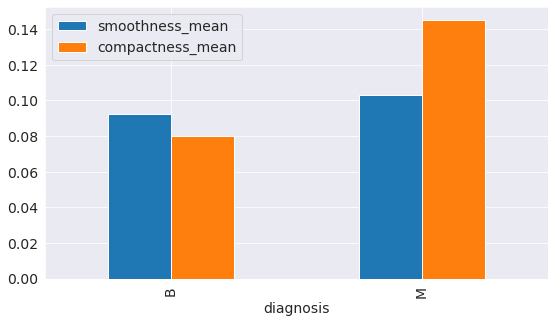

In [23]:
#visualizing new_df1
new_df1.plot(kind = 'bar')

In [24]:
new_df2 = breast_cancer_raw_df.groupby('diagnosis')[['concavity_mean', 'concave points_mean']].mean()

In [25]:
new_df2

,concavity_mean,concave points_mean
diagnosis,,
B,0.046058,0.025717
M,0.160775,0.087990


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:xlabel='diagnosis'>

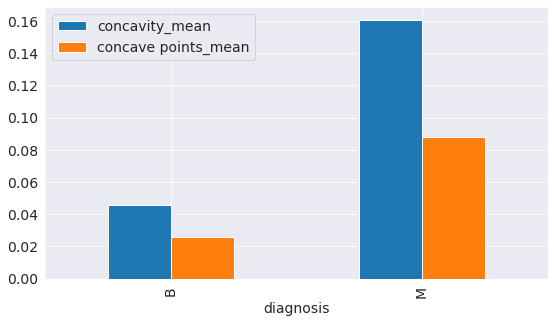

In [26]:
new_df2.plot(kind= 'bar')

In [27]:
import numpy as np

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

            Target Variable Distribution           


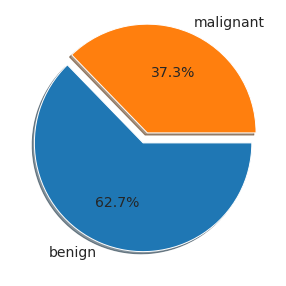

In [28]:
#in the samples how many are Benign and how many are malignant
labels = ['benign', 'malignant']
target = 'diagnosis'
MAP={}
for e, i in enumerate(sorted(breast_cancer_raw_df[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = breast_cancer_raw_df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [29]:
means_only_df = breast_cancer_raw_df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis=1)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [30]:
new_df6= breast_cancer_raw_df.groupby('diagnosis')[['texture_mean']].mean()

In [31]:
new_df6

,texture_mean
diagnosis,
B,17.914762
M,21.604906


<AxesSubplot:xlabel='diagnosis'>

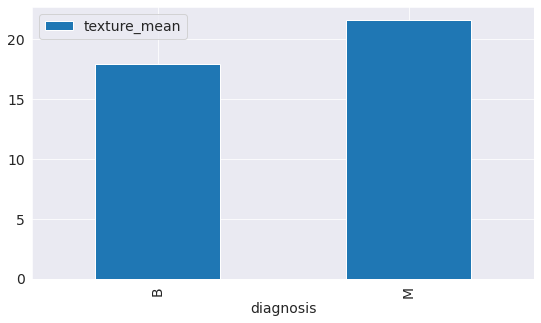

In [32]:
new_df6.plot(kind='bar')

Let us save and upload our work to Jovian before continuing

In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour


'https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - which tumour has more smoothness ?

In [35]:
new_df3 = breast_cancer_raw_df.groupby('diagnosis')[['smoothness_mean']].mean()

In [36]:
new_df3

,smoothness_mean
diagnosis,
B,0.092478
M,0.102898


#### malignant tumour showed more smoothness than benign tumour. 

#### Q2: TODO - ten ids that have largest malignant tumour area_mean

In [37]:
means_only_df.sort_values('area_mean', ascending=False).head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,0.2061,0.05623
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782
521,91762702,M,24.63,21.60,165.5,1841.0,0.10300,0.2106,0.2310,0.14710,0.1991,0.06739
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229


#### Q3: TODO - which tumour has more tissue complexity ?
######## complexity of the tumour is defined by its fractal dimension from 0 to 1 

In [38]:
new_df4 = breast_cancer_raw_df.groupby('diagnosis')[['fractal_dimension_mean']].mean()

In [39]:
new_df4

,fractal_dimension_mean
diagnosis,
B,0.062867
M,0.062680


######## the tissue complexity is almost similar in both the tumours

#### Q4: TODO - out of 10 how many tumours are benign with lowest concavity 

In [40]:
means_only_df.sort_values('concavity_mean', ascending= True).head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,0.07359
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,0.07285
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,0.05960
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.0,0.0,0.1742,0.06059
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,0.05948
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422


######## apparently the least concavity a benign tumour have is nil. and all are benign. 

#### Q5: TODO - how many malignant tunours are there in top 100 tumours with highest perimeter

In [41]:
high_perimeter_df = means_only_df.sort_values('perimeter_mean', ascending=False).head(100)

In [42]:
high_perimeter_df.groupby('diagnosis')[['perimeter_mean']].count()

,perimeter_mean
diagnosis,
M,100


####### All are malignant. 

Let us save and upload our work to Jovian before continuing.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour


'https://jovian.ai/anukrati0306/classification-of-breast-cancer-based-on-the-type-of-tumour'

## Inferences and Conclusion

**TODO** - This project is about understanding the breast cancer tumor attributes as with the help of those attributes we can classify the tumor in two categories either benign or malignant, the benign tumor are non cancerous and do not spread from one body part to another and the malignant tumors are cancerous and get transported from one part of the body to another, as the data was analyzed, it was found out that malignant tumor had more compactness and smoothness than the benign tumor, and a very high concavity as well. 
the tissue complexity was found to be almost similar but the top 100 tumor with higher perimeter were only malignant. 


In [47]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()